In [63]:
import numpy as np
import pandas as pd
from scipy.signal import welch
import matplotlib.pyplot as plt
%matplotlib inline

In [64]:
df = pd.read_parquet("ngao.parquet")
df


,WfeRms,SegmentWfeRms,SegmentPiston
0,[1.1366469152562786e-06],"[8.932390755944652e-07, 1.0550861588853877e-06...","[-2.028438984780223e-06, -1.6327965113305254e-..."
1,[1.1366596481821034e-06],"[8.930126114137238e-07, 1.0549663329584291e-06...","[-2.028787321251002e-06, -1.6325268461514497e-..."
2,[1.1366714716132265e-06],"[8.927871704145218e-07, 1.0548596947046462e-06...","[-2.029141796811018e-06, -1.632263320061611e-0..."
3,[1.1366819308022968e-06],"[8.925605925469426e-07, 1.054759309226938e-06,...","[-2.0295035483286483e-06, -1.631993768569373e-..."
4,[1.1366902299414505e-06],"[8.92340722202789e-07, 1.054648237186484e-06, ...","[-2.029855295404559e-06, -1.6317272866217536e-..."
...,...,...,...
7995,[1.8596900019929308e-07],"[1.8360681508511334e-07, 1.7638588190038718e-0...","[9.146787771641129e-10, 6.517012263174138e-09,..."
7996,[1.860401681597068e-07],"[1.8363844844770938e-07, 1.763714152502871e-07...","[9.229959574419411e-10, 6.656575290975297e-09,..."
7997,[1.8614436214647867e-07],"[1.8374436194790178e-07, 1.764398405157408e-07...","[9.991107940976462e-10, 7.271274249376347e-09,..."
7998,[1.8626280962052988e-07],"[1.8386808164905233e-07, 1.7653138684181613e-0...","[1.0820846441106369e-09, 7.885751607261682e-09..."


In [65]:
t = np.arange(df.shape[0])/8000
seg_piston = np.vstack(df["SegmentPiston"])*1e9
wfe_rms = np.vstack(df["WfeRms"])*1e9
seg_wfe_rms = np.vstack(df["SegmentWfeRms"])*1e9


Text(0, 0.5, 'Segment piston [nm]')

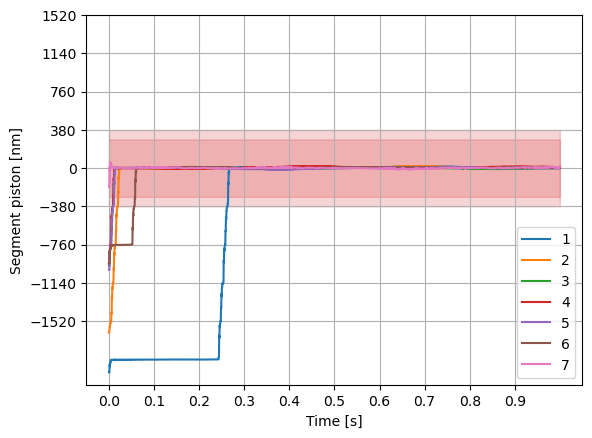

In [66]:
fig,ax = plt.subplots()
ax.plot(t,seg_piston)
ax.legend(range(1,8))
ax.fill_between(t,-380,380,color="C3",alpha=0.2)
ax.fill_between(t, -0.375 * 760, 0.375 * 760, color="C3", alpha=0.2)
ax.grid()
ax.set_xticks(np.arange(0,1,0.1))
ax.set_yticks(np.arange(-4,5)*380)
ax.set_xlabel("Time [s]")
ax.set_ylabel("Segment piston [nm]")

#ax.set_xlim(0, 0.2)
#ax.set_ylim(-50,50)


(-2000.0, 500.0)

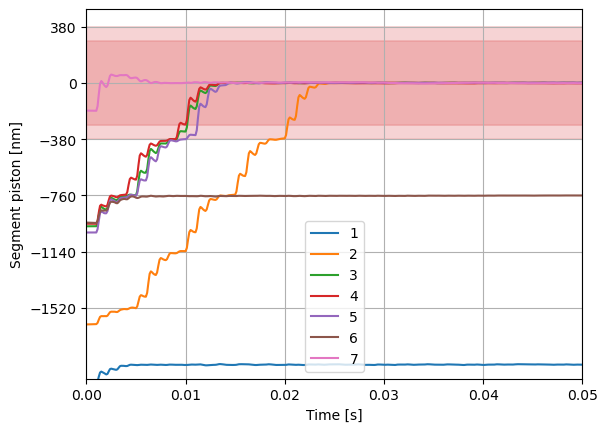

In [67]:
fig,ax = plt.subplots()
ax.plot(t,seg_piston)
ax.legend(range(1,8))
ax.fill_between(t,-380,380,color="C3",alpha=0.2)
ax.fill_between(t, -0.375 * 760, 0.375 * 760, color="C3", alpha=0.2)
ax.grid()
ax.set_xticks(np.arange(0,1,0.01))
ax.set_yticks(np.arange(-4,5)*380)
ax.set_xlabel("Time [s]")
ax.set_ylabel("Segment piston [nm]")

ax.set_xlim(0, 0.05)
ax.set_ylim(-2000,500)


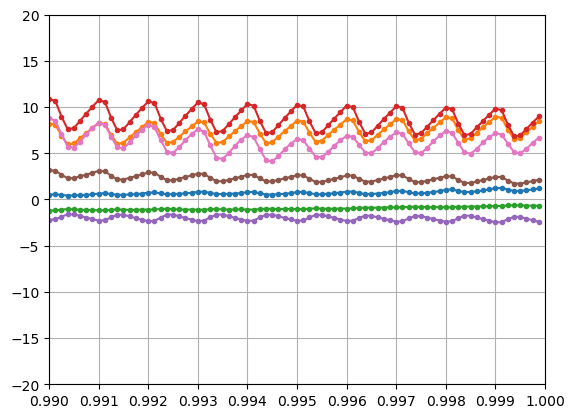

In [68]:
fig,ax = plt.subplots()
ax.plot(t,seg_piston,'.-')
ax.grid()
ax.set_xlim(1-0.01,1)
ax.set_ylim(-20,20)
ax.set_xticks(np.arange(0.99,1,1e-3));

(0.0, 500.0)

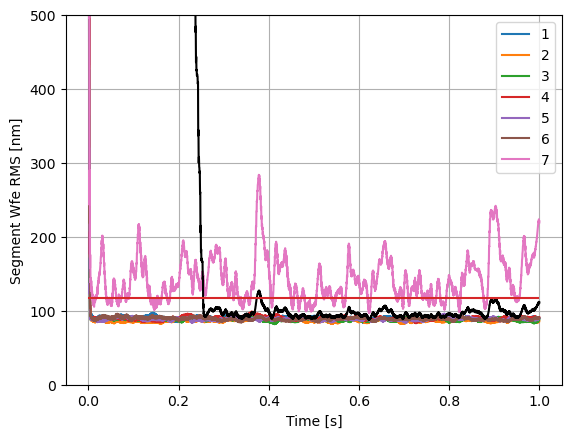

In [14]:
fig, ax = plt.subplots()
ax.plot(t, seg_wfe_rms)
ax.legend(range(1, 8))
ax.plot(t, wfe_rms,"k")
ax.hlines(117,0,1,'C3')
ax.grid()
ax.set_xlabel("Time [s]")
ax.set_ylabel("Segment Wfe RMS [nm]")
#ax.set_xlim([0,0.1])
ax.set_ylim([0,500])
#ax.set_xticks(np.arange(0,1,0.1));

In [15]:
wfe_rms[t>0.5].mean()

96.52384738040834

(50.0, 300.0)

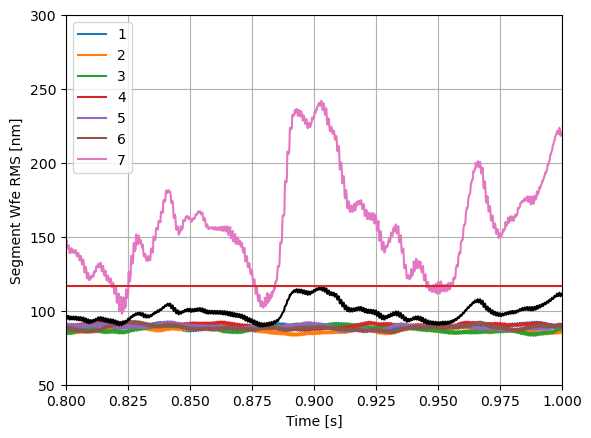

In [16]:
fig, ax = plt.subplots()
ax.plot(t, seg_wfe_rms)
ax.legend(range(1, 8))
ax.plot(t, wfe_rms,"k")
ax.hlines(117,0,1,'C3')
ax.grid()
ax.set_xlabel("Time [s]")
ax.set_ylabel("Segment Wfe RMS [nm]")
ax.set_xlim(1-0.2, 1)
ax.set_ylim(50, 300)  
# ax.set_ylim([0,500])
#ax.set_xticks(np.arange(0,1,0.1));

(0.0, 0.15)

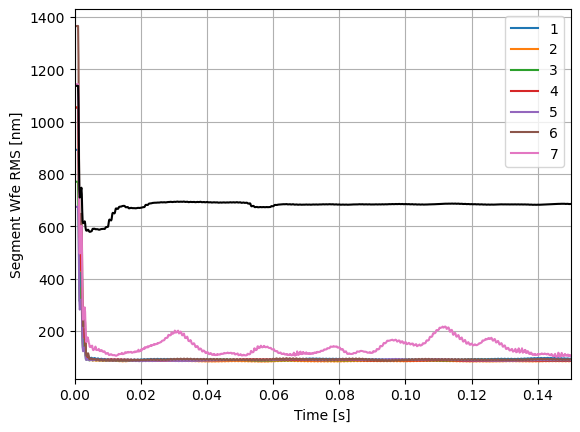

In [17]:
fig, ax = plt.subplots()
ax.plot(t, seg_wfe_rms)
ax.legend(range(1, 8))
ax.plot(t, wfe_rms,"k")
ax.grid()
ax.set_xlabel("Time [s]")
ax.set_ylabel("Segment Wfe RMS [nm]")
ax.set_xlim([0,0.15])
#ax.set_ylim([0,500])
#ax.set_xticks(np.arange(0,1,0.1));

In [62]:
df = pd.read_parquet("data.parquet")
df

,VoiceCoilsForces#1,VoiceCoilsForces#7
0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
...,...,...
7996,"[-0.00990876311708362, 0.012714673468411626, -...","[0.0018714037618908345, 0.0007150619859992727,..."
7997,"[-0.0095112037020425, 0.012869708440833749, -0...","[0.002135397130450695, 0.0007006694221965632, ..."
7998,"[-0.009490505892929312, 0.012822853107551588, ...","[0.0020221426539073165, 0.0006254981934395184,..."
7999,"[-0.00944289949755325, 0.012827281597430025, -...","[0.002066999187294076, 0.0006637558622116482, ..."


Text(0, 0.5, 'Voice coil forces [N]')

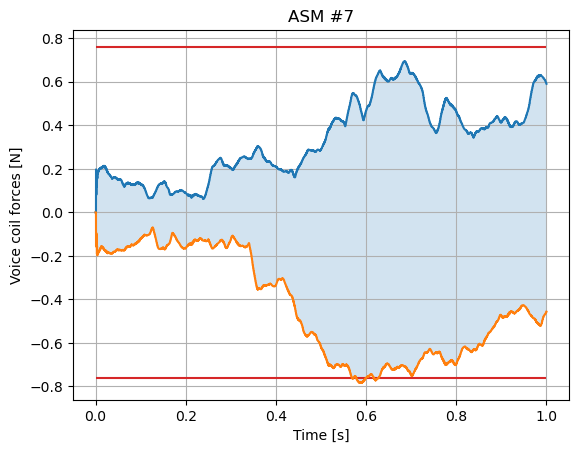

In [59]:
forces = np.vstack(df["VoiceCoilsForces#7"])
(forces.min(),forces.max())
t = np.arange(forces.shape[0])/8e3
fig,ax = plt.subplots()
ax.hlines(0.76,0,1,'C3')
ax.hlines(-0.76,0,1,'C3')
ax.plot(t,forces.max(1))
ax.plot(t,forces.min(1))
ax.fill_between(t, forces.max(1), forces.min(1), alpha=0.2)
ax.grid()
ax.set_title("ASM #7")
ax.set_xlabel("Time [s]")
ax.set_ylabel("Voice coil forces [N]")

Text(0, 0.5, 'Voice coil forces [N]')

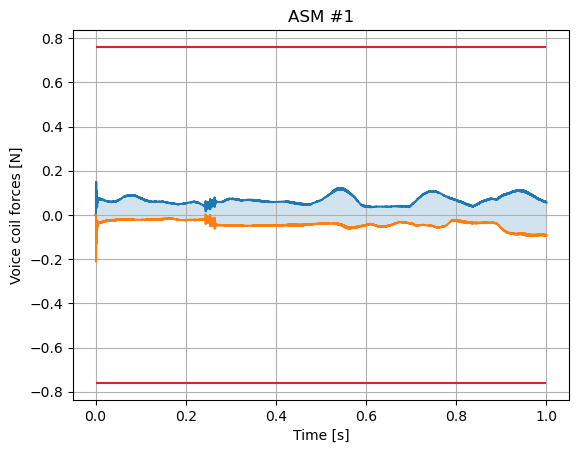

In [60]:
forces = np.vstack(df["VoiceCoilsForces#1"])
(forces.min(),forces.max())
t = np.arange(forces.shape[0])/8e3
fig,ax = plt.subplots()
ax.hlines(0.76,0,1,'C3')
ax.hlines(-0.76,0,1,'C3')
ax.plot(t,forces.max(1))
ax.plot(t,forces.min(1))
ax.fill_between(t, forces.max(1), forces.min(1), alpha=0.2)
ax.grid()
ax.set_title("ASM #1")
ax.set_xlabel("Time [s]")
ax.set_ylabel("Voice coil forces [N]")


In [45]:
dfn = pd.read_parquet("../../asms/ASMS-nodes.parquet")
dfn

,S1,S2,S3,S4,S5,S6,S7
0,"[-0.03639629823712, 0.363365523203351, 0.00944...","[-0.5034526715110165, -0.009802872414338193, 0...","[-0.036396298237072994, 0.36336552320324766, 0...","[-0.5034526715111739, -0.009802872414821187, 0...","[-0.03639629823719279, 0.36336552320324716, 0....","[-0.50345267151135, -0.009802872414010233, 0.0...","[0.309860148703232, 0.2001289024144926, 0.0111..."
1,"[0.125366029263795, -0.38030901219380103, 0.01...","[-0.5027962964556788, 0.026548711257379204, 0....","[0.12536602926385115, -0.3803090121939021, 0.0...","[-0.5027962964558499, 0.026548711256896135, 0....","[0.12536602926372917, -0.38030901219390206, 0....","[-0.5027962964560037, 0.026548711257706387, 0....","[0.222725179324661, -0.29403806527514276, 0.01..."
2,"[-0.31602207203862, 0.24499424739325049, 0.012...","[-0.5014842787485148, -0.04610705835327708, 0....","[-0.31602207203857124, 0.24499424739314324, 0....","[-0.5014842787486813, -0.04610705835376142, 0....","[-0.3160220720386931, 0.24499424739314332, 0.0...","[-0.5014842787488606, -0.046107058352951036, 0...","[0.288393980164027, 0.22998652469475944, 0.011..."
3,"[0.31602155815302, 0.2449949092672041, 0.01269...","[-0.49951857561640567, 0.06275817243140552, 0....","[0.3160215581530669, 0.24499490926710454, 0.01...","[-0.4995185756165689, 0.06275817243092197, 0.0...","[0.3160215581529466, 0.24499490926710255, 0.01...","[-0.4995185756167104, 0.06275817243173137, 0.0...","[-0.26894593304058, -0.19767455985425264, 0.00..."
4,"[-0.01819920434875, -0.43458247698438285, 0.01...","[-0.49690138045148047, -0.08217457343870466, 0...","[-0.018199204348694903, -0.43458247698448477, ...","[-0.4969013804516348, -0.08217457343918788, 0....","[-0.0181992043488155, -0.43458247698448405, 0....","[-0.4969013804518366, -0.0821745734383898, 0.0...","[-0.20779172659863, 0.3047744866178807, 0.0111..."
...,...,...,...,...,...,...,...
670,"[0.496901570189443, -0.08181493026818662, 0.02...","[0.49690158931219774, -0.08217333989504622, 0....","[0.49690157018949543, -0.08181493026828443, 0....","[0.49690158931204287, -0.08217333989546345, 0....","[0.49690157018937364, -0.08181493026828501, 0....","[0.4969015893118496, -0.08217333989501019, 0.0...","[-0.18256788461425, -0.06318735921214239, -0.0..."
671,"[0.503452695590093, -0.009443037119758902, 0.0...","[0.49951842452227946, 0.06275941247172559, 0.0...","[0.5034526955901436, -0.009443037119855696, 0....","[0.4995184245221135, 0.06275941247130759, 0.02...","[0.5034526955900238, -0.009443037119857722, 0....","[0.4995184245219696, 0.06275941247176084, 0.02...","[0.070913273371028, 0.14119993643538548, -0.00..."
672,"[0.499518433603219, 0.06311817631832842, 0.023...","[0.5014843980319794, -0.04610581343282774, 0.0...","[0.4995184336032663, 0.06311817631823002, 0.02...","[0.5014843980318191, -0.046105813433245546, 0....","[0.49951843360315007, 0.06311817631822905, 0.0...","[0.501484398031637, -0.04610581343279324, 0.02...","[-0.0835311606936, -0.0900251808139016, -0.003..."
673,"[0.460738174452999, 0.20279117846209022, 0.023...","[0.5027962352913223, 0.026549959434658016, 0.0...","[0.4607381744530491, 0.20279117846199182, 0.02...","[0.502796235291159, 0.0265499594342401, 0.0224...","[0.46073817445292686, 0.20279117846199052, 0.0...","[0.5027962352910057, 0.02654995943469224, 0.02...","[0.069180629682761, 0.10146934741151183, -0.00..."


In [48]:
xyz.shape

(675, 3)

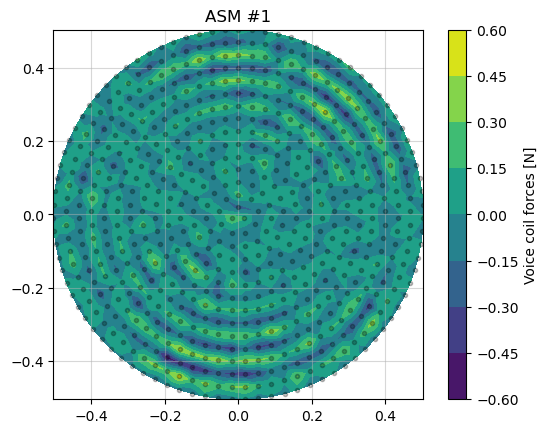

In [81]:
xyz = np.vstack(dfn['S1'])
forces = np.vstack(df["VoiceCoilsForces#1"])
fig,ax = plt.subplots()
h = ax.tricontourf(xyz[:,0],xyz[:,1],forces[-1,:])
xyz = np.vstack(dfn['S1'])
ax.plot(xyz[:,0],xyz[:,1],'k.',alpha=0.25)
fig.colorbar(h,ax=ax,label="Voice coil forces [N]")
ax.set_aspect('equal')
ax.grid(alpha=0.5)
ax.set_title("ASM #1");


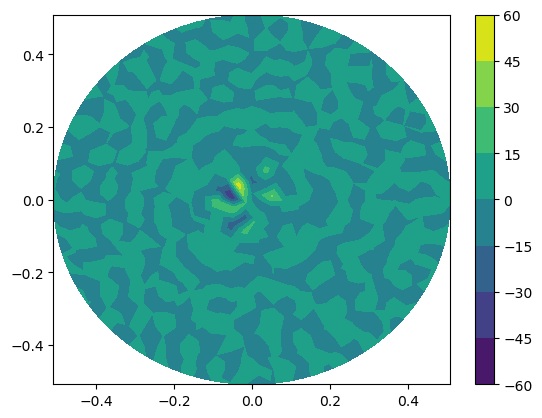

In [54]:
xyz = np.vstack(dfn['S7'])
forces = np.vstack(df["VoiceCoilsForces#7"])
fig,ax = plt.subplots()
h = ax.tricontourf(xyz[:,0],xyz[:,1],forces[-1,:])
fig.colorbar(h,ax=ax)

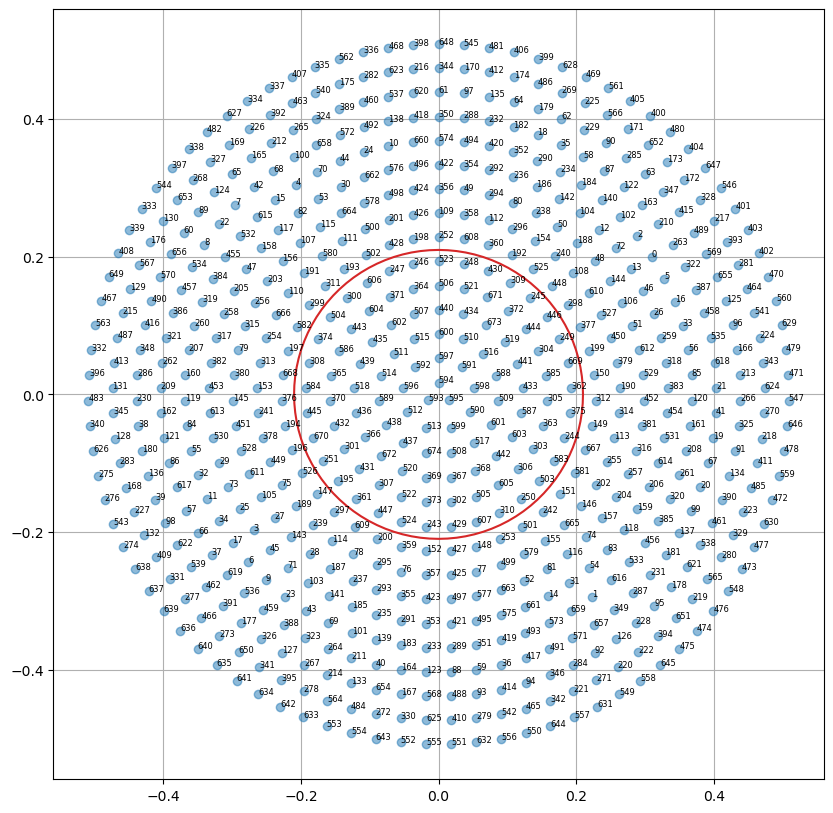

In [60]:
fig,ax = plt.subplots(figsize=(10,10))
i = 1
xyz = np.vstack(dfn['S7'])
ax.plot(xyz[:,0],xyz[:,1],'C0o',alpha=0.5)
for i in range(xyz.shape[0]):
    ax.text(xyz[i,0],xyz[i,1],f"{i}",fontdict={"fontsize":6})
o = np.linspace(0,2*np.pi,101)
(xl,yl) = (np.cos(o),np.sin(o))
rring = 0.21
ax.plot(xl*rring,yl*rring,"C3")
ax.set_aspect('equal')
ax.grid()

In [63]:
r = np.hypot(xyz[:,0],xyz[:,1])>rring

Text(0, 0.5, 'Voice coil forces [N]')

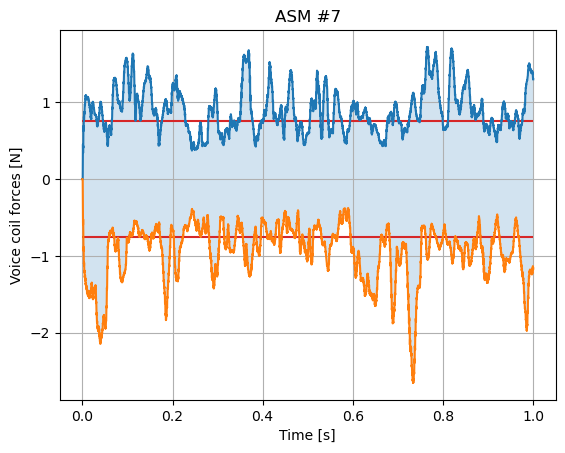

In [68]:
forces = np.vstack(df["VoiceCoilsForces#7"])
(forces.min(),forces.max())
t = np.arange(forces.shape[0])/8e3
fig,ax = plt.subplots()
ax.hlines(0.76,0,1,'C3')
ax.hlines(-0.76,0,1,'C3')
ax.plot(t,forces[:,r].max(1))
ax.plot(t,forces[:,r].min(1))
ax.fill_between(t, forces[:,r].max(1), forces[:,r].min(1), alpha=0.2)
ax.grid()
ax.set_title("ASM #7")
ax.set_xlabel("Time [s]")
ax.set_ylabel("Voice coil forces [N]")

In [5]:
dfd = pd.read_parquet("debug.parquet")
dfd

,ResidualM2modes
0,"[5.9262110774227494e-09, -3.453033059486188e-0..."
1,"[3.9909444637942215e-09, 3.7374054073779917e-0..."
2,"[-2.086654582456049e-08, 3.370320911244562e-08..."
3,"[8.182134969558774e-09, 1.3516299190996506e-09..."
4,"[-8.60829629800719e-09, 1.4595359587588064e-08..."
...,...
995,"[8.400434792221745e-10, -6.1256697492240164e-0..."
996,"[5.995898444410841e-09, 2.733370685348291e-08,..."
997,"[-2.4683506349987283e-09, -4.731717595518603e-..."
998,"[1.1565335356067408e-09, 8.487826441694324e-09..."


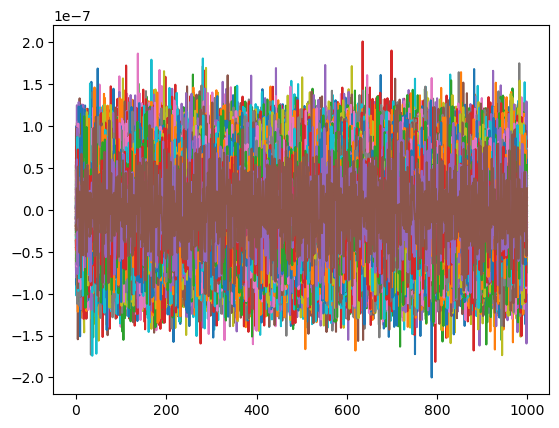

In [20]:
y = np.vstack(dfd["ResidualM2modes"])
plt.plot(y[:,:496]);
#plt.plot(y[:,496:]);

In [52]:
nu,psd_y = welch(y[:,:496],fs=1000)
psd_y_mean = np.median(psd_y,0)
psd_y_mean[-5:],(100e-7/8000)**2


(array([2.56457928e-18, 2.62035070e-18, 2.68244240e-18, 2.64395844e-18,
        1.16097018e-18]),
 1.5625000000000002e-18)

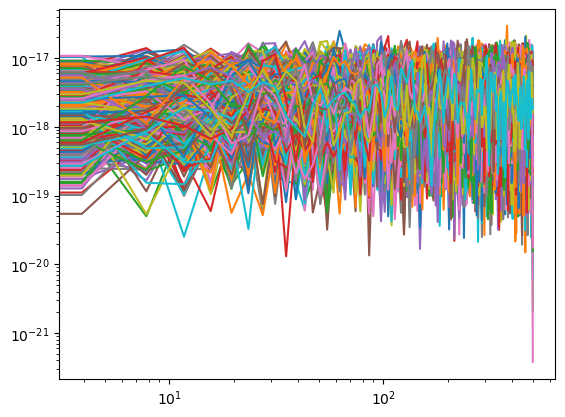

In [57]:
plt.loglog(nu,psd_y.T);

In [53]:
tf_db = 10*np.log10(psd_y_mean[:-2]/psd_y_mean[-2])

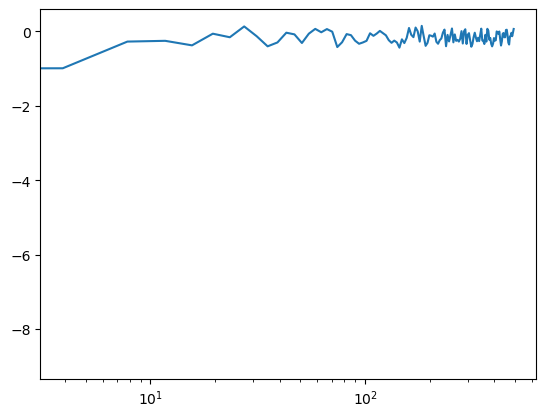

In [54]:
fig,ax = plt.subplots()
ax.semilogx(nu[:-2],tf_db);
